In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [17]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [18]:
print("="*60)
print("METHOD 1: UPLOAD ZIP FILE FROM YOUR COMPUTER")
print("="*60)

from google.colab import files
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

METHOD 1: UPLOAD ZIP FILE FROM YOUR COMPUTER


In [19]:
zip_filename = list(uploaded.keys())[0]
print(f"\n✓ Uploaded: {zip_filename}")


✓ Uploaded: archive (2).zip


In [20]:
print("\n📂 Extracting ZIP file...")
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('dataset')


📂 Extracting ZIP file...


In [21]:
print("\n📁 Directory structure:")
for root, dirs, files in os.walk('dataset'):
    level = root.replace('dataset', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Show first 5 files
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... and {len(files)-5} more files')


📁 Directory structure:
dataset/
  all_features.csv
  features.csv
  features/
    all_features.csv
    preprocess.csv
    training_features.csv
  raw_data/
    32/
      t2/
        segMask_tumor.nrrd
        imagingVolume.nrrd
      t1/
        segMask_tumor.nrrd
        imagingVolume.nrrd
    19/
      t2/
        segMask_tumor.nrrd
        imagingVolume.nrrd
      t1/
        segMask_tumor.nrrd
        imagingVolume.nrrd
    15/
      t2/
        segMask_tumor.nrrd
        imagingVolume.nrrd
      t1/
        segMask_tumor.nrrd
        imagingVolume.nrrd
    22/
      t2/
        segMask_tumor.nrrd
        imagingVolume.nrrd
      t1/
        segMask_tumor.nrrd
        imagingVolume.nrrd
    34/
      t2/
        segMask_tumor.nrrd
        imagingVolume.nrrd
      t1/
        segMask_tumor.nrrd
        imagingVolume.nrrd
    37/
      t2/
        segMask_tumor.nrrd
        imagingVolume.nrrd
      t1/
        segMask_tumor.nrrd
        imagingVolume.nrrd
    10/
      t2/
        s

In [22]:
digits = load_digits()

print("\n✓ Dataset loaded!")
print(f"Dataset shape: {digits.data.shape}")
print(f"Number of samples: {digits.data.shape[0]}")
print(f"Number of features (pixels): {digits.data.shape[1]}")
print(f"Number of classes: {len(np.unique(digits.target))}")
print(f"Classes: {np.unique(digits.target)}")


✓ Dataset loaded!
Dataset shape: (1797, 64)
Number of samples: 1797
Number of features (pixels): 64
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]



SAMPLE IMAGES


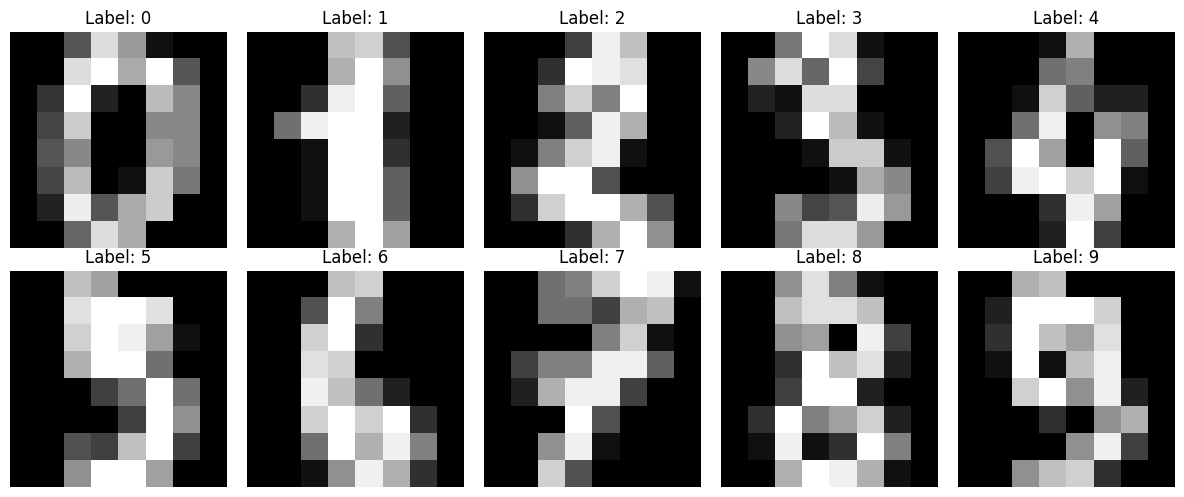

In [23]:
print("\n" + "="*50)
print("SAMPLE IMAGES")
print("="*50)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [24]:
X = digits.data
y = digits.target

print("\n✓ Data prepared")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Show what the data looks like
print("\nFirst image as pixel values (8x8):")
print(digits.images[0])
print(f"\nFlattened (64 features): {X[0][:10]}... (showing first 10)")
print(f"Label: {y[0]}")


✓ Data prepared
X shape: (1797, 64)
y shape: (1797,)

First image as pixel values (8x8):
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Flattened (64 features): [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]... (showing first 10)
Label: 0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✓ Data split into train and test sets")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("\nTraining set class distribution:")
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} samples")



✓ Data split into train and test sets
Training samples: 1437
Testing samples: 360

Training set class distribution:
  Digit 0: 142 samples
  Digit 1: 146 samples
  Digit 2: 142 samples
  Digit 3: 146 samples
  Digit 4: 145 samples
  Digit 5: 145 samples
  Digit 6: 145 samples
  Digit 7: 143 samples
  Digit 8: 139 samples
  Digit 9: 144 samples


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features scaled (standardized)")


✓ Features scaled (standardized)


In [27]:
print("\n" + "="*50)
print("TRAINING MODEL")
print("="*50)

# Using 'lbfgs' solver which works well for multiclass
# max_iter increased for convergence
model = LogisticRegression(
    max_iter=10000,
    solver='lbfgs',
    multi_class='multinomial',
    random_state=42
)

print("\nTraining... (this may take a moment)")
model.fit(X_train_scaled, y_train)

print("✓ Model trained successfully!")


TRAINING MODEL

Training... (this may take a moment)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✓ Model trained successfully!


In [28]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("\n✓ Predictions made!")


✓ Predictions made!


In [29]:
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\n" + "-"*50)
print("Detailed Classification Report (Test Set):")
print("-"*50)
print(classification_report(y_test, y_test_pred))


MODEL EVALUATION

Training Accuracy: 0.9993 (99.93%)
Testing Accuracy: 0.9722 (97.22%)

--------------------------------------------------
Detailed Classification Report (Test Set):
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360




CONFUSION MATRIX


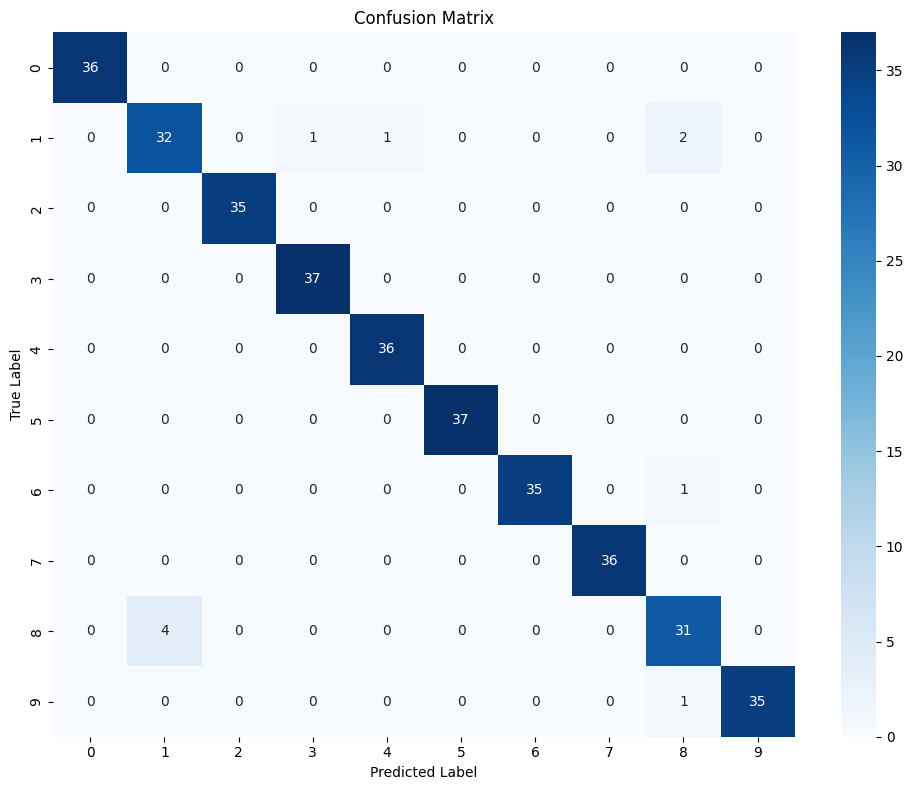

In [30]:
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


SAMPLE PREDICTIONS

Correct predictions: 350
Incorrect predictions: 10


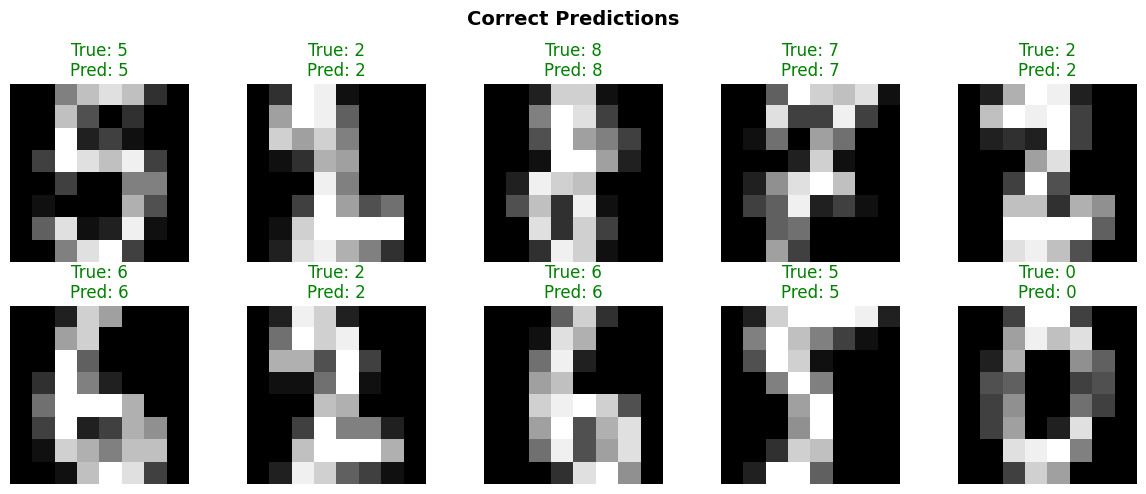

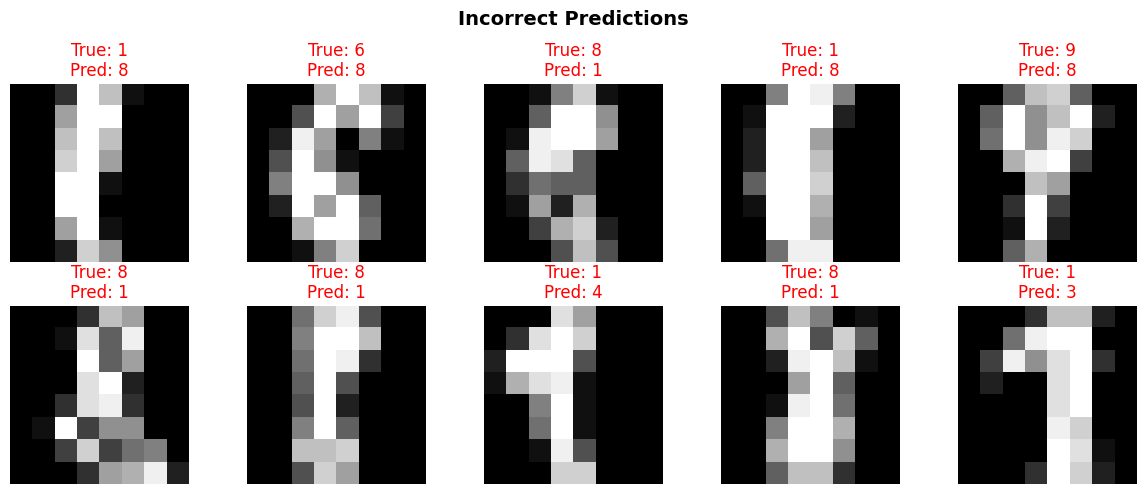

In [31]:
print("\n" + "="*50)
print("SAMPLE PREDICTIONS")
print("="*50)

# Get indices of correct and incorrect predictions
correct_idx = np.where(y_test == y_test_pred)[0]
incorrect_idx = np.where(y_test != y_test_pred)[0]

print(f"\nCorrect predictions: {len(correct_idx)}")
print(f"Incorrect predictions: {len(incorrect_idx)}")

# Visualize some correct predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Correct Predictions', fontsize=14, fontweight='bold')
for i, ax in enumerate(axes.flat):
    if i < len(correct_idx):
        idx = correct_idx[i]
        ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
        ax.set_title(f'True: {y_test[idx]}\nPred: {y_test_pred[idx]}',
                     color='green')
        ax.axis('off')
plt.tight_layout()
plt.show()

# Visualize some incorrect predictions (if any)
if len(incorrect_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle('Incorrect Predictions', fontsize=14, fontweight='bold')
    for i, ax in enumerate(axes.flat):
        if i < len(incorrect_idx):
            idx = incorrect_idx[i]
            ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
            ax.set_title(f'True: {y_test[idx]}\nPred: {y_test_pred[idx]}',
                         color='red')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()



PREDICTION PROBABILITIES

Sample image (index 0):


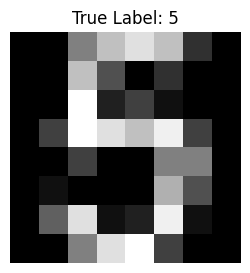


Prediction probabilities for each class:
  Digit 0: 0.0001 
  Digit 1: 0.0000 
  Digit 2: 0.0000 
  Digit 3: 0.0000 
  Digit 4: 0.0000 
  Digit 5: 0.9180 █████████████████████████████████████████████
  Digit 6: 0.0001 
  Digit 7: 0.0000 
  Digit 8: 0.0005 
  Digit 9: 0.0812 ████

Predicted class: 5


In [32]:
print("\n" + "="*50)
print("PREDICTION PROBABILITIES")
print("="*50)

# Get probabilities for first test sample
sample_idx = 0
sample_proba = model.predict_proba(X_test_scaled[[sample_idx]])[0]

print(f"\nSample image (index {sample_idx}):")
plt.figure(figsize=(3, 3))
plt.imshow(X_test[sample_idx].reshape(8, 8), cmap='gray')
plt.title(f'True Label: {y_test[sample_idx]}')
plt.axis('off')
plt.show()

print("\nPrediction probabilities for each class:")
for digit, prob in enumerate(sample_proba):
    bar = '█' * int(prob * 50)
    print(f"  Digit {digit}: {prob:.4f} {bar}")

print(f"\nPredicted class: {y_test_pred[sample_idx]}")


PREDICT ON NEW IMAGE


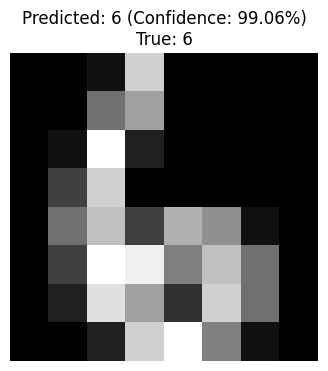


True label: 6
Predicted: 6
Confidence: 99.06%


In [33]:
print("\n" + "="*50)
print("PREDICT ON NEW IMAGE")
print("="*50)

# Select a random test image
new_idx = np.random.randint(0, len(X_test))
new_image = X_test[new_idx].reshape(1, -1)
new_image_scaled = scaler.transform(new_image)

# Make prediction
prediction = model.predict(new_image_scaled)[0]
probabilities = model.predict_proba(new_image_scaled)[0]
confidence = np.max(probabilities)

# Display result
plt.figure(figsize=(4, 4))
plt.imshow(X_test[new_idx].reshape(8, 8), cmap='gray')
plt.title(f'Predicted: {prediction} (Confidence: {confidence:.2%})\nTrue: {y_test[new_idx]}')
plt.axis('off')
plt.show()

print(f"\nTrue label: {y_test[new_idx]}")
print(f"Predicted: {prediction}")
print(f"Confidence: {confidence:.2%}")


MODEL COEFFICIENTS


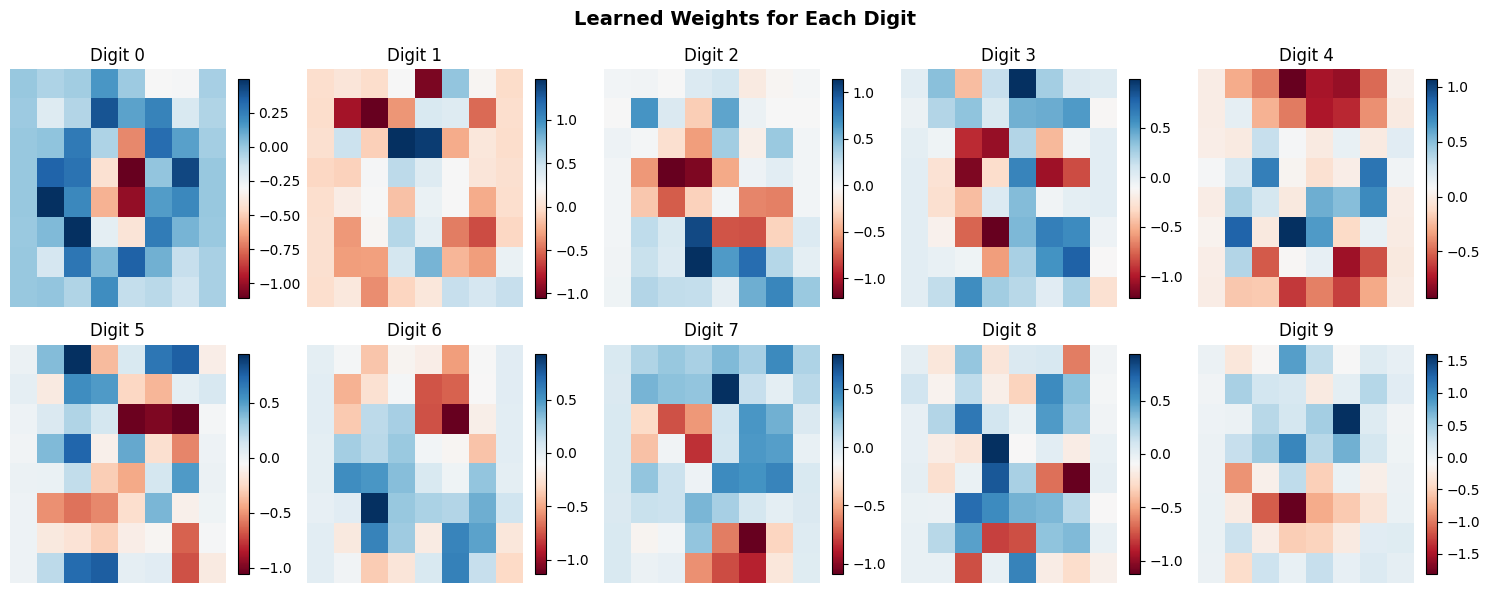


✓ LOGISTIC REGRESSION IMAGE CLASSIFICATION COMPLETE!

Final Test Accuracy: 97.22%


In [34]:
print("\n" + "="*50)
print("MODEL COEFFICIENTS")
print("="*50)

# Visualize coefficients for each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Learned Weights for Each Digit', fontsize=14, fontweight='bold')

for digit in range(10):
    ax = axes[digit // 5, digit % 5]
    coef = model.coef_[digit].reshape(8, 8)
    im = ax.imshow(coef, cmap='RdBu', aspect='auto')
    ax.set_title(f'Digit {digit}')
    ax.axis('off')
    plt.colorbar(im, ax=ax, fraction=0.046)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("✓ LOGISTIC REGRESSION IMAGE CLASSIFICATION COMPLETE!")
print("="*50)
print(f"\nFinal Test Accuracy: {test_accuracy*100:.2f}%")